In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("mnist_train.csv")

In [3]:
label=df['label']

In [4]:
label.shape

(42000,)

In [5]:
df.drop("label",1,inplace=True)

In [6]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(42000, 784)

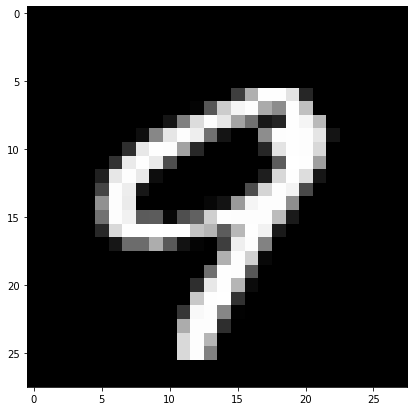

In [8]:
plt.figure(figsize=(7,7))
index=100
grid=df.iloc[index].to_numpy().reshape(28,28)
plt.imshow(grid,interpolation = "none",cmap = "gray")
plt.show()

In [9]:
label[index]

9

In [10]:
labels=label.head(10000)

In [11]:
data=df.head(10000)

In [12]:
data.shape

(10000, 784)

In [13]:
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [16]:
scaled_data=sc.fit_transform(data)

In [17]:
scaled_data.shape

(10000, 784)

In [18]:
covar=np.matmul(scaled_data.T,scaled_data)

In [19]:
covar.shape

(784, 784)

In [20]:
from scipy.linalg import eigh

In [21]:
values,vectors=eigh(covar,eigvals=(782,783))
print(vectors.shape)

(784, 2)


In [22]:
vectors.shape

(784, 2)

In [23]:
vectors=vectors.T
vectors.shape

(2, 784)

In [24]:
coordinates=np.matmul(vectors,scaled_data.T)

In [25]:
coordinates.shape

(2, 10000)

In [26]:
coordinates=np.vstack((coordinates,labels)).T

In [27]:
coordinates.shape

(10000, 3)

In [28]:
df=pd.DataFrame(data=coordinates,columns=['first','second','label'])

In [29]:
df

,first,second,label
0,-5.448069,-4.949725,1.0
1,6.833972,18.966372,0.0
2,-2.051008,-7.527935,1.0
3,5.555069,-0.715448,4.0
4,7.291958,26.253689,0.0
...,...,...,...
9995,-3.227868,-0.474806,5.0
9996,0.814569,-0.089362,0.0
9997,-5.235608,-1.546243,4.0
9998,18.981138,2.425728,7.0


<IPython.core.display.Javascript object>

<Figure size 576x432 with 0 Axes>

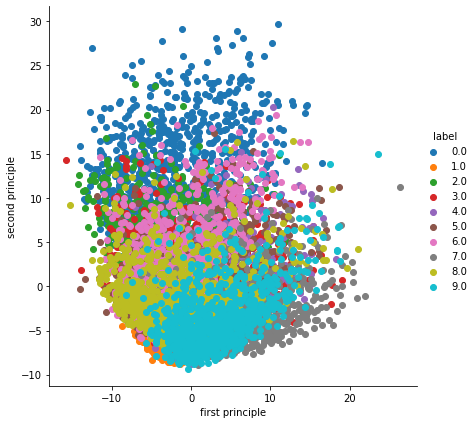

In [30]:
plt.figure(figsize=(8,6))
sns.FacetGrid(df, hue="label", size=6).map(plt.scatter, 'first','second').add_legend()
plt.xlabel("first principle")
plt.ylabel("second principle")
plt.show()

# Using Scikit

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca=PCA(n_components=2)

In [33]:
x_pca=pca.fit_transform(scaled_data)

In [34]:
x_pca.shape

(10000, 2)

In [35]:
pca_data=np.vstack((x_pca.T,labels)).T

In [36]:
pca_df=pd.DataFrame(data=pca_data,columns=['first','second','labels'])

In [37]:
pca_df

,first,second,labels
0,-4.949594,-5.449812,1.0
1,18.966546,6.831923,0.0
2,-7.527938,-2.050968,1.0
3,-0.715382,5.554093,4.0
4,26.253688,7.292006,0.0
...,...,...,...
9995,-0.474879,-3.226954,5.0
9996,-0.089235,0.813289,0.0
9997,-1.545959,-5.239156,4.0
9998,2.426156,18.975699,7.0


<IPython.core.display.Javascript object>

<Figure size 576x432 with 0 Axes>

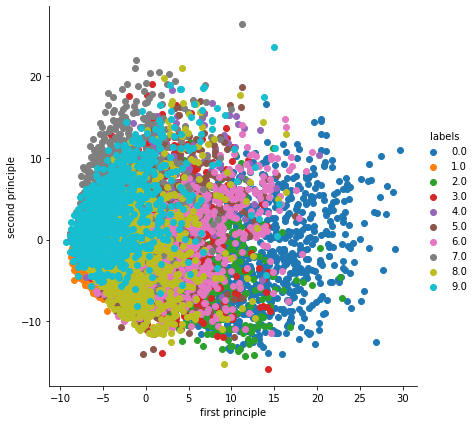

In [38]:
plt.figure(figsize=(8,6))
sns.FacetGrid(pca_df, hue="labels", size=6).map(plt.scatter, 'first','second').add_legend()
plt.xlabel("first principle")
plt.ylabel("second principle")
plt.show()

# taking whole data

In [39]:
df=pd.read_csv("mnist_train.csv")

In [40]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
label=df['label']

In [42]:
df.drop("label",1,inplace=True)

In [43]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
sc=StandardScaler()

In [45]:
df_sc=sc.fit_transform(df)

In [46]:
df_sc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca=PCA(n_components=2)

In [49]:
df_pca=pca.fit_transform(df_sc)

In [50]:
df_pca.shape

(42000, 2)

In [51]:
label.shape

(42000,)

In [52]:
pca_data=np.vstack((df_pca.T,label)).T

In [53]:
df_pca=pd.DataFrame(data=pca_data,columns=['first','second','label'])

In [54]:
df_pca

,first,second,label
0,-5.140457,-5.226617,1.0
1,19.292309,6.033256,0.0
2,-7.644511,-1.705811,1.0
3,-0.474273,5.836661,4.0
4,26.559572,6.024768,0.0
...,...,...,...
41995,13.678834,-1.350235,0.0
41996,-8.869586,-1.187163,1.0
41997,0.495382,7.076229,7.0
41998,2.307191,-4.344390,6.0


<IPython.core.display.Javascript object>

Text(27.170601851851856, 0.5, 'Second Principle')

<Figure size 576x432 with 0 Axes>

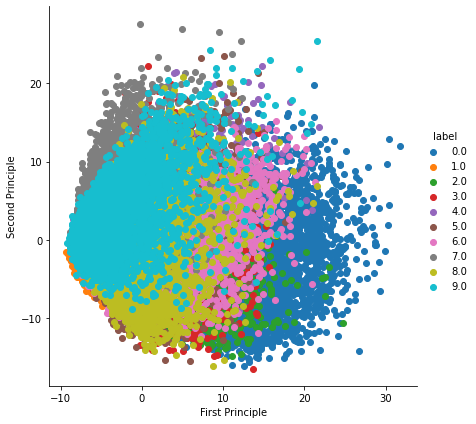

In [55]:
plt.figure(figsize=(8,6))
sns.FacetGrid(df_pca,hue='label',size=6).map(plt.scatter,'first','second').add_legend()
plt.xlabel("First Principle")
plt.ylabel("Second Principle")

# PCA Not for Visualization

In [56]:
pca=PCA(n_components=784)

In [57]:
df_pca=pca.fit_transform(df)

In [58]:
percentage_var=pca.explained_variance_/np.sum(pca.explained_variance_)

In [59]:
cum_var=np.cumsum(percentage_var)

In [60]:
cum_var.shape

(784,)

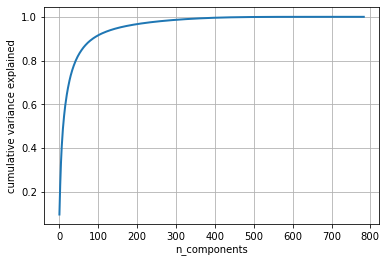

In [61]:
plt.figure(figsize=(6,4))
plt.clf()
plt.plot(cum_var,linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cumulative variance explained")
plt.show()